# How to create an aplitude-frequency characteristics

## Simulation model

![title](10_02_Fma.jpg)

$F_o=2N, \omega\in\left<1,20\right)s^{-1}$

$m=1.0kg$

$b=1Nms^{-1}$

$k=100Nm^{-1}$

$F\left(t\right)=F_o\sin\left(\omega_0 t\right)$


## Simulation

We are using a Runge-Kutta first order integration method, known as _Euler's_ method.

### How it works?

First calculate acceleration $a = \frac{F}{m}$:

$\ddot{x}_{t+1} = \frac{F}{m}$

velocity follows:

$\dot{x}_{t+1} = \dot{x_t} + \ddot{x}_{t+1}\Delta_t$

and position:

$x_{t+1} = x_t + \dot{x}_{t+1}\Delta_t$

Movement equation:

$m\ddot{q}+b\dot{q}+kq=F(t)$

rewrite as:

$\ddot{q}=\frac{F(t)}{m}-\frac{b}{m}\dot{q}-\frac{k}{m}q$

and finally numeric integrated as:

$\dot{q}_{t+1} = \dot{q_t} + \ddot{q}_{t+1}\Delta_t$

$q_{t+1} = q_t + \dot{q}_{t+1}\Delta_t$


### Initialization

In [2]:
import pylab as plt
import numpy as np
from math import sqrt

steps = 1000
time = 60.0
dt = time / steps

print(dt)

m = 1.0      # kg
k = 100.     # N/m
b = 1.0      # Nm/s

#
# constant force
F_zero = 2. # N
#
# time based force
time_base = np.linspace(0, steps*dt, steps+1) 

#
# omega in range <1, 20)
omegas = range(1,20)

0.06


### Calculation of natural frequency $\Omega_0$ and dumping ratio $b_r$

In [3]:
omega = sqrt(k/m)
print('Natural frequency Omega = {0}'.format(omega))
print('Damping ratio     Br    = {0}'.format(b / (2 * m * omega)))

Natural frequency Omega = 10.0
Damping ratio     Br    = 0.05


### Let's simulate for all $\omega_0$ is set $\omega$ 

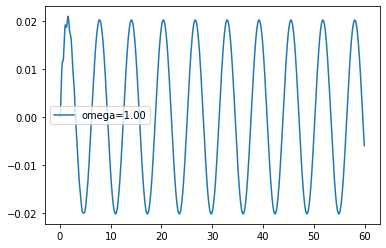

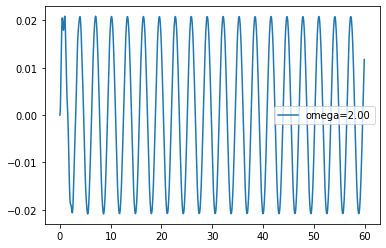

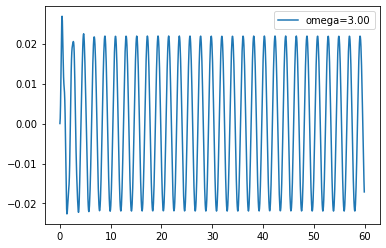

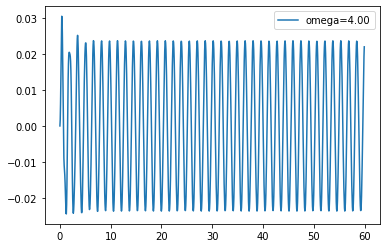

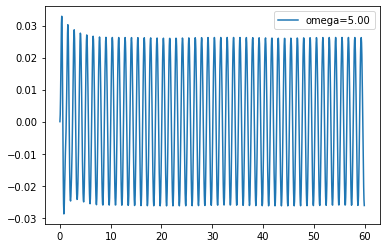

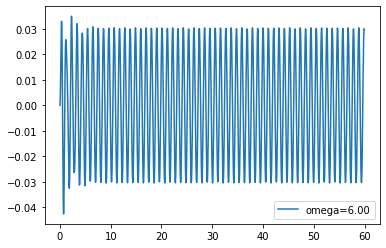

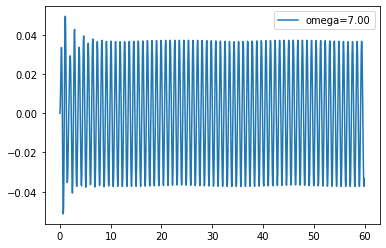

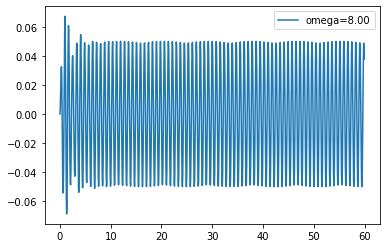

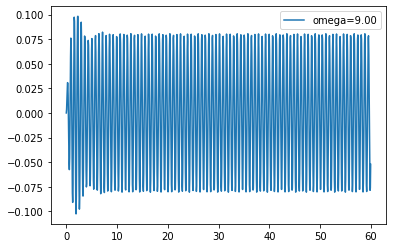

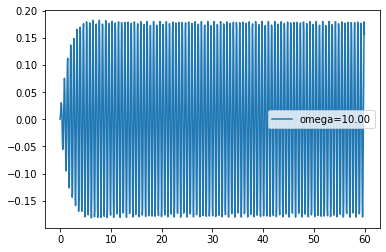

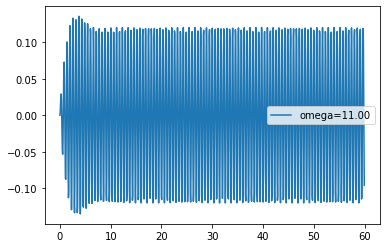

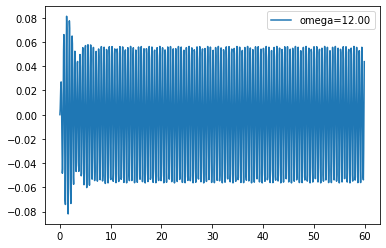

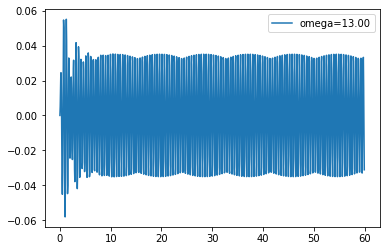

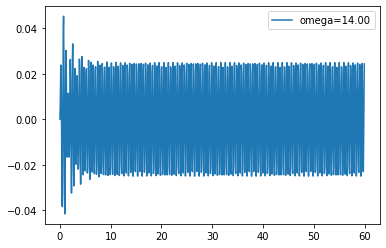

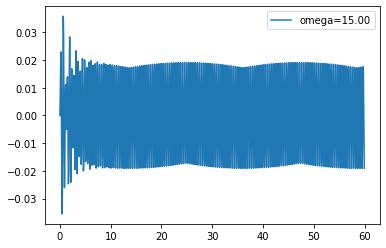

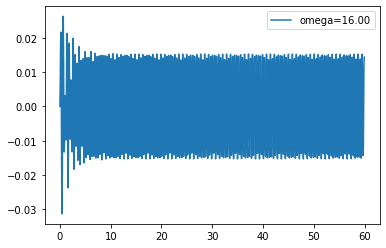

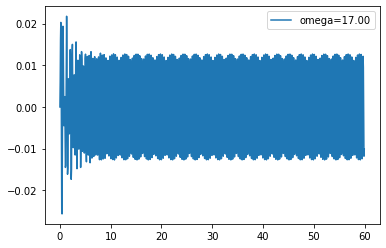

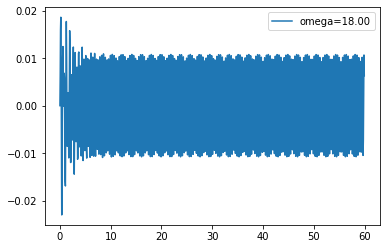

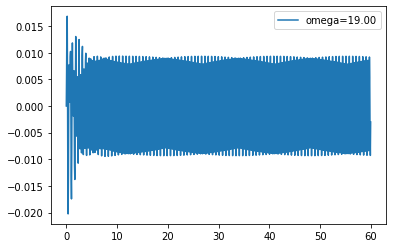

In [4]:
graph_counter = 0
for omega_zero in omegas:
    F = F_zero * np.sin(omega_zero * time_base)
    
    q = 0      
    q_dot = 0  
    q_2dot = 0
        
    t, a, v, x, f = [], [], [], [], []
    for i in range(steps):
        """
        Runge-Kutta first order -> Euler
        """
        q_2dot = (F[i] / m) - (b / m) * q_dot - (k / m) * q
        q_dot = q_dot + q_2dot * dt
        q = q + q_dot * dt
        
        a.append(q_2dot)
        v.append(q_dot)
        x.append(q)
        
        #t.append(dt*i)
        t.append(time_base[i])
        f.append(F[i])
        
    plt.figure()
    plt.plot(t, x)
    plt.legend(['omega=%4.2f' % omega_zero])
    graph_counter += 1

plt.show()

### Amplitude-frequency characteristics

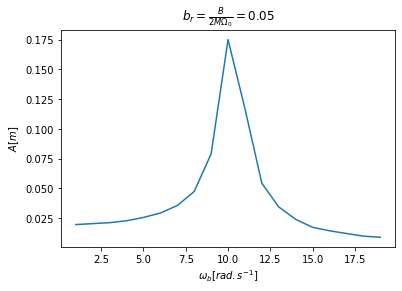

In [5]:
sdata = [0.0196, 0.0204, 0.0212, 0.0228, 0.0256, 0.0293, 0.0356, 0.0474, 0.0790, 0.175, 0.117, 0.0543, 0.0344, 0.0240, 0.0173, 0.0144, 0.0121, 0.0099, 0.0089]
plt.figure()
plt.plot(range(1,len(sdata)+1),sdata)
plt.title(r'$b_r=\frac{B}{2M\Omega_0}=0.05$')
plt.xlabel('$\omega_b [rad.s^{-1}]$')
plt.ylabel('$A[m]$')
plt.show()